In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#生成数据
X=[[0,0],[0,1],[1,0],[1,1]]
Y=[[0],[1],[1],[0]]
X=np.array(X).astype('int16')
Y=np.array(Y).astype('int16')
lr = 0.001

In [2]:
#设置权重和偏执
W1 = np.random.rand(2,2) * 0.01
W2 = np.random.rand(1,2) * 0.01
b1 = np.random.rand(2,1) * 0.01
b2 = np.random.rand(1,1) * 0.01
print("W1.shape",W1.shape)
print("W2.shape",W2.shape)

W1.shape (2, 2)
W2.shape (1, 2)


In [3]:
def Relu(x):
     return np.maximum(x, 0)
def ratio(x):
    c = np.maximum(x,0)
    c[c>0] = 1
    return c

In [4]:
def train(X,y):
    global W1,W2,b1,b2
    #print(X.shape)
    #print(np.dot(W1,X).shape)
    a = Relu(np.dot(W1,X)+b1)    
   # print("a.shape",a.shape)
    y_hat = Relu(np.dot(W2,a)+b2)
    
    #print("a.shape",a.shape)
    #print("y_hat.shape",y_hat.shape)
    
    error = np.fabs(y_hat - y)
    dz2 = (y_hat - y) * ratio(y_hat)
    dW2 = dz2 * a.T
    db2 = dz2
    dz1 = dz2 * W2.T * ratio(a)
    db1 = dz1
    dW1 = X * dz1.T
    
    
    #print("dW2.shape",dW2.shape)
    #print("dW1.shape",dW1.shape)
    
    W2 -= lr * dW2
    W1 -= lr * dW1
    b2 -= lr * db2
    b1 -= lr * db1
    
    #print("Error: ",error)
    return error

In [5]:
f = open('data.csv','w',encoding='utf8')
counter = 0
for i in range(10000):
    for j in range(4):
        X_temp = np.resize(np.array(X[j].T),(2,1))
        Y_temp = np.resize(np.array(Y[j]),(1,1))
        er = train(X_temp,Y_temp)
        
        content = str(counter)+','+str(float(er))+'\n'
        #print(content)
        f_a = f.write(content)
        counter += 1
f.close()        
print("W1:",W1)
print("W2:",W2)
print("b1:",b1)
print("b2:",b2)


W1: [[ 0.00496479  0.00451683]
 [ 0.00103721  0.01251072]]
W2: [[ 0.00454358  0.01620881]]
b1: [[ 0.00266556]
 [ 0.01428657]]
b2: [[ 0.49962432]]


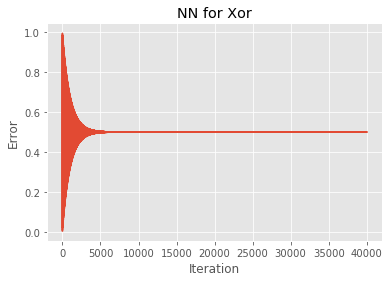

In [6]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

x,y = np.loadtxt('data.csv',
                 unpack=True,
                 delimiter = ',')

plt.plot(x,y)
plt.title('NN for Xor')
plt.ylabel('Error')
plt.xlabel('Iteration')

plt.show()